## Learning objectives:

At the end of this
* Understand cost function, Gradient Descent.

* Tune the following hyperparameters:
    * learning rate
    * number of epochs
    * batch size
* Interpret different kinds of loss curves.

# What is Gradient Descent?
Gradient descent is an optimization algorithm used in machine learning to minimize the cost function by iteratively adjusting parameters in the direction of the negative gradient, aiming to find the optimal set of parameters.

The cost function represents the discrepancy between the predicted output of the model and the actual output. The goal of gradient descent is to find the set of parameters that minimizes this discrepancy and improves the model’s performance.

The algorithm operates by calculating the gradient of the cost function, which indicates the direction and magnitude of steepest ascent. However, since the objective is to minimize the cost function, gradient descent moves in the opposite direction of the gradient, known as the negative gradient direction.

By iteratively updating the model’s parameters in the negative gradient direction, gradient descent gradually converges towards the optimal set of parameters that yields the lowest cost.

The <b>learning rate</b>, a hyperparameter, determines the step size taken in each iteration, influencing the speed and stability of convergence.

Gradient descent can be applied to various <u>machine learning algorithms, including linear regression, logistic regression, neural networks, and support vector machines</u>. It provides a general framework for optimizing models by iteratively refining their parameters based on the <b>cost function or loss</b>.

# Example of Gradient Descent
Let’s say you are playing a game where the players are at the top of a mountain, and they are asked to reach the lowest point of the mountain. Additionally, they are blindfolded. So, what approach do you think would make you reach the lake?

Take a moment to think about this before you read on.

The best way is to observe the ground and find where the land descends. From that position, take a step in the descending direction and iterate this process until we reach the lowest point.

![image.png](attachment:image.png)

<b>Gradient descent</b> is an iterative optimization algorithm for finding the local minimum of a function.

To find the local minimum of a function using gradient descent, we must take steps proportional to the negative of the gradient (move away from the gradient) of the function at the current point. If we take steps proportional to the positive of the gradient (moving towards the gradient), we will approach a local maximum of the function, and the procedure is called <u>Gradient Ascent</u>.

![image-2.png](attachment:image-2.png)

<b>The goal of the gradient descent algorithm is to minimize the given function (say cost function). To achieve this goal, it performs two steps iteratively:

- Compute the gradient (slope), the first order derivative of the function at that point
- Make a step (move) in the direction opposite to the gradient, opposite direction of slope increase from the current point by alpha times the gradient at that point</b>

<b>Stochastic Gradient Descent</b>

- Stochastic gradient descent is most commonly used in machine learning models as it updates the model’s parameters using the gradient of one training example at a time. It randomly selects a training example, computes the gradient of the cost function for that example, and updates the parameters in the opposite direction. Stochastic gradient descent is computationally efficient and can converge faster than batch gradient descent. However, it can be noisy and may not converge to the global minimum.

# Alpha – The Learning Rate
We have the direction we want to move in, now we must decide the size of the step we must take.

*It must be chosen carefully to end up with local minima.

<b>If the learning rate is too high, we might OVERSHOOT the minima and keep bouncing, without reaching the minima
If the learning rate is too small, the training might turn out to be too long.</b>

![image.png](attachment:image.png)

<b>a) Learning rate is optimal, model converges to the minimum
b) Learning rate is too small, it takes more time but converges to the minimum
c) Learning rate is higher than the optimal value, it overshoots but converges ( 1/C < η <2/C)
d) Learning rate is very large, it overshoots and diverges, moves away from the minima, performance decreases on learning</b>

![image-2.png](attachment:image-2.png)
Note: As the gradient decreases while moving towards the local minima, the size of the step decreases. So, the learning rate (alpha) can be constant over the optimization and need not be varied iteratively.

# Local Minima
The cost function may consist of many minimum points. The gradient may settle on any one of the minima, which depends on the initial point (i.e initial parameters(theta)) and the learning rate. Therefore, the optimization may converge to different points with different starting points and learning rate.
![image.png](attachment:image.png)

# Epochs & Batch Size

An <B>EPOCH</B> in machine learning means one complete pass of the training dataset through the algorithm. This epoch's number is an important hyperparameter for the algorithm. It specifies the number of epochs or complete passes of the entire training dataset passing through the training or learning process of the algorithm.

<b>Example</b>: Suppose one uses a dataset with 200 samples (where samples mean the data rows) with 1,000 epochs and a 5 batch size to define epoch-making. The dataset then has each of the 40 batches having 5 samples, with the model weights being updated when each batch of 5 samples passes through. Also, in this case, one epoch in machine learning involves 40 batches, meaning the model will be updated 40 times.

Also, since the epoch number is 1,000, it means the whole dataset passes through the model, and the model itself will pass through 1.000 runs. When there are 40 batches or updates to the model, it means the training dataset has 40,000 batches being used in the process of training the algorithm on this dataset!

The <B>batch size</B> is a number of samples processed before the model is updated. The number of epochs is the number of complete passes through the training dataset. The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.

## Sample Implementation
We want to train a linear regression model to a synthetic dataset and explore the effects of different hyperparameters like learning rate, epochs, batch size and discover its effect on the cost function (loss) of the model. Gradient Descent is also applied as  an optimization algorithm to minimize the cost function in linear regression.

## Import relevant modules

The following cell imports the packages that the program requires:

In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds an empty model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass.


In [2]:
#Define the functions that build and train a model
def build_model(my_learning_rate):

# Most simple tf.keras models are sequential.
  # A sequential model contains one or more layers.

  model = tf.keras.models.Sequential()
  # Describe the topography of the model.
  # The topography of a simple linear regression model is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))

# Compile the model topography into code that TensorFlow can efficiently execute.
#Configure training to minimize the model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the
  # model. The model will train for the specified number
  # of epochs, gradually learning how the feature values
  # relate to the label values.
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the
  # rest of history.
  epochs = history.epoch

  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean
  # squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")

Defined build_model and train_model


## Define plotting functions

We're using a popular Python library called [Matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) to create the following two plots:

*  a plot of the feature values vs. the label values, and a line showing the output of the trained model.
*  a [loss curve](https://developers.google.com/machine-learning/glossary/#loss_curve).

We hid the following code cell because learning Matplotlib is not relevant to the learning objectives. Regardless, you must still run all hidden code cells.

In [3]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


## Define the dataset

The dataset consists of 12 [examples](https://developers.google.com/machine-learning/glossary/#example). Each example consists of one [feature](https://developers.google.com/machine-learning/glossary/#feature) and one [label](https://developers.google.com/machine-learning/glossary/#label).


In [4]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

## Specify the hyperparameters

The hyperparameters in this Colab are as follows:

  * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
  * [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
  * [batch_size](https://developers.google.com/machine-learning/glossary/#batch_size)

The following code cell initializes these hyperparameters and then invokes the functions that build and train the model.

Epoch 1/1000
1/1 [==============================] - 0s 328ms/step - loss: 1041.6063 - root_mean_squared_error: 32.2739
Epoch 2/1000
1/1 [==============================] - 0s 17ms/step - loss: 597.7493 - root_mean_squared_error: 24.4489
Epoch 3/1000
1/1 [==============================] - 0s 14ms/step - loss: 383.0196 - root_mean_squared_error: 19.5709
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 253.8850 - root_mean_squared_error: 15.9338
Epoch 5/1000
1/1 [==============================] - 0s 13ms/step - loss: 170.0739 - root_mean_squared_error: 13.0412
Epoch 6/1000
1/1 [==============================] - 0s 17ms/step - loss: 113.8878 - root_mean_squared_error: 10.6718
Epoch 7/1000
1/1 [==============================] - 0s 12ms/step - loss: 75.7671 - root_mean_squared_error: 8.7044
Epoch 8/1000
1/1 [==============================] - 0s 11ms/step - loss: 49.8993 - root_mean_squared_error: 7.0639
Epoch 9/1000
1/1 [==============================] - 0s 14ms/step -

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


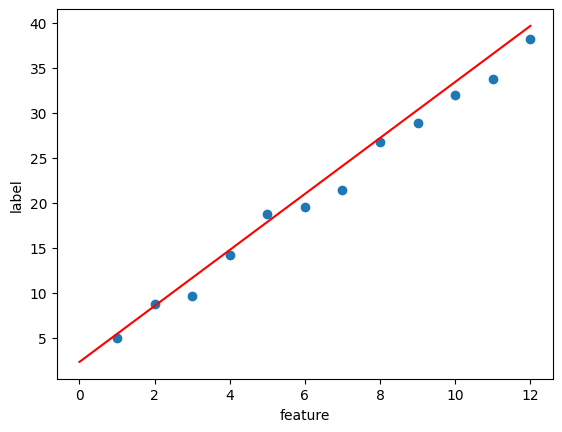

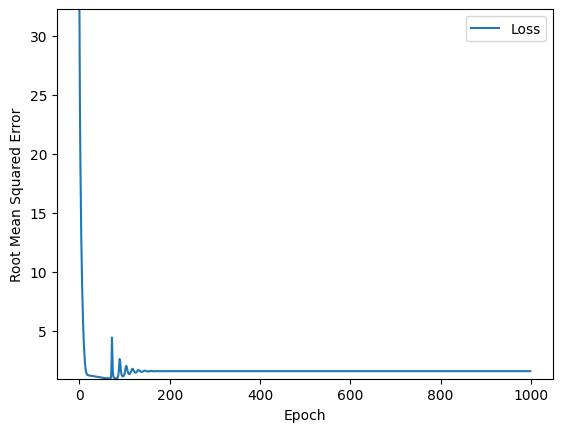

In [24]:
learning_rate=0.3
epochs=1000
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# Task 1: Examine the graphs

1. Examine the top graph. The blue dots identify the actual data; the red line identifies the output of the trained model. Ideally, the red line should align nicely with the blue dots.  Does it? How?


2. Examine the bottom graph, which shows the loss curve. What is your interpretation of the graph?
3. In relation to the lesson on cost function and the goal of a linear regression model, what should be the ideal scenario for this model?

#1. Based on my observation on the top graph, the blue dots or the actual data is not aligned nicely to the red line or the trained model.
#2. On the bottom graph which is the loss curve, it shows that every epochs, the loss gradually goes down or it became smaller.
#3. In relation to the lesson, the ideal scenario of this model should be, the top graph where the blue dots and the red line should aligned with each other. While in the loss curve, the curve should be converging with the x axis.

# Task 2: Ideal epochs

Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should stay steady (zero slope or nearly zero slope), which indicates that training has converged.

In Task 1, the training loss did not converge. One possible solution is to train for more epochs.  
1. Your task is to train the model with three (3) different number of epochs that will sufficiently get the model to converge.
2. Examine the loss curve for each epoch. Does the model converge? Briefly explain.

#1. I tried to train the model with different number of epochs. I noticed that to align the blue dots with the red line you should use large number of epochs. At first i tried using smaller numbers like 15, 2, 5, 20 and it doesn't give a good model. But after using 1000 epochs it gave me an almost aligned actual data and trained model.
#2. Every epoch shows minimal changes on the curve. After using a big number of epoch it started to converge.

# Task 3: Increase the learning rate

In Task 2, you increased the number of epochs to get the model to converge. Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.

Describe what happens to the model's performance.

#I increased the learning rate of the model from 0.01 to 0.3 and based on the result, the loss curve converged more than its previous model.

# Task 4: Find the ideal combination of epochs and learning rate

Assign values to the following two hyperparameters to make training converge as efficiently as possible:

*  learning_rate
*  epochs

Describe the effects on model's performance.

#I assigned a value of 0.3 to the learning rate while i assigned a value of 1000 for the epochs and the result showed an almost perfectly aligned data and training model. The loss curve shows a more converged graph.

# Task 5: Adjust the batch size

The system recalculates the model's loss value and adjusts the model's weights and bias after each **iteration**.  Each iteration is the span in which the system processes one batch. For example, if the **batch size** is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.  

One **epoch** spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.  

The model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge.

Experiment with `batch_size`. What's the smallest integer you can set for `batch_size` and still have the model converge in a hundred epochs?

#Upon experimenting different batch sizes, I think the smallest value I can use that will still show a good model that is still converged is batch size 12. I tried smaller numbers than 12 and it showed static curve lines.